In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
surv_counts = df['Survived'].value_counts(normalize=True) * 100
print(surv_counts.rename(index={0: 'Не выжили (%)', 1: 'Выжили (%)'}))


Survived
Не выжили (%)    63.636364
Выжили (%)       36.363636
Name: proportion, dtype: float64


In [40]:
surv_sex = df.groupby('Sex')['Survived'].mean() * 100
print(surv_sex.rename(index={'male': 'Мужчины (%)', 'female': 'Женщины (%)'}))

Sex
Женщины (%)    100.0
Мужчины (%)      0.0
Name: Survived, dtype: float64


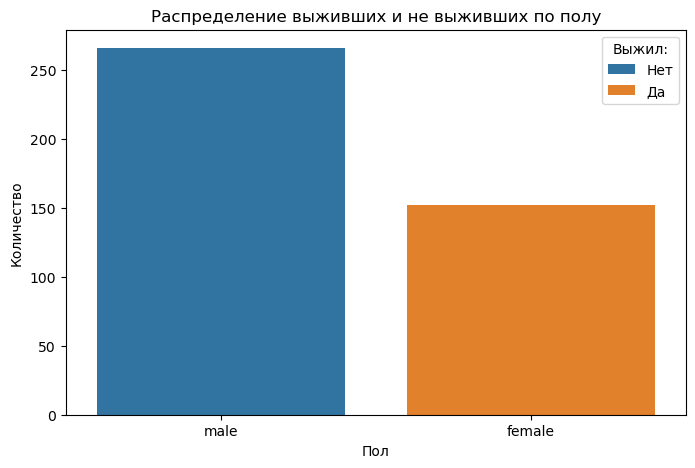

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Распределение выживших и не выживших по полу') 
plt.xlabel('Пол') 
plt.ylabel('Количество') 
plt.legend(title='Выжил:', labels=['Нет', 'Да']) 
plt.show()

In [42]:
survival_sex_counts = pd.crosstab(df['Sex'], df['Survived'])
survival_sex_counts.columns = ['Не выжили', 'Выжили']
survival_sex_counts.index = ['Женщины', 'Мужчины']
print(survival_sex_counts)

         Не выжили  Выжили
Женщины          0     152
Мужчины        266       0


In [49]:
print("Выживаемость по классу билета(внутри класса)")
survival_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_pclass.rename(index={1: '1 класс (%)', 2: '2 класс (%)', 3: '3 класс (%)'}))

Выживаемость по классу билета(внутри класса)
Pclass
1 класс (%)    46.728972
2 класс (%)    32.258065
3 класс (%)    33.027523
Name: Survived, dtype: float64


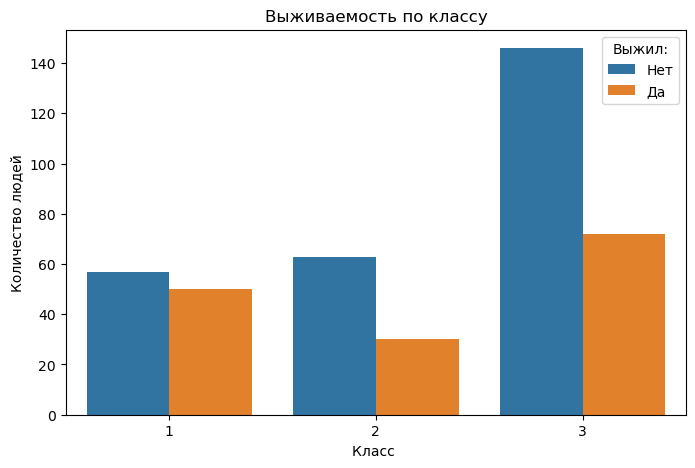

In [50]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Выживаемость по классу')
plt.xlabel('Класс ')
plt.ylabel('Количество людей')
plt.legend(title='Выжил:', loc='upper right', labels=['Нет', 'Да'])
plt.show()

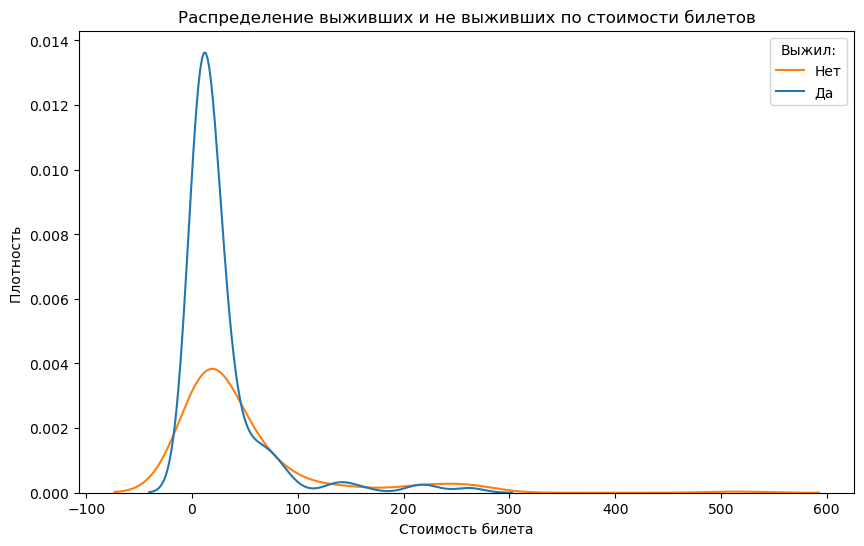

In [51]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Fare', hue='Survived')
plt.title('Распределение выживших и не выживших по стоимости билетов')
plt.xlabel('Стоимость билета')
plt.ylabel('Плотность ')
plt.legend(title='Выжил:', labels=['Нет', 'Да'])
plt.show()

In [52]:
df['Fam_size'] = df['SibSp'] + df['Parch'] + 1
df['LastName'] = df['Name'].str.split(',').str[0].str.strip()
if 'Survived' in df.columns:
    survived_fam = df.query('Fam_size > 1 and Survived == 1')
    sum_fam = survived_fam.groupby(['LastName', 'Fam_size']).size().reset_index(name='SurvivedCount')
    sum_fam = sum_fam.sort_values(by='SurvivedCount', ascending=False)
    print("Выжившие семьи")
    pd.set_option('display.max_rows', None) #Для вывода ВСЕХ строк
    print(sum_fam)
    pd.reset_option('display.max_rows')
    print(f"Выжившие семья: {len(sum_fam)-1}")



Выжившие семьи
            LastName  Fam_size  SurvivedCount
1             Becker         4              2
2              Brown         3              2
26            Gibson         2              2
17              Dean         4              2
43            Klasen         3              2
24           Fortune         6              2
57           Peacock         3              2
62              Sage        11              2
4            Cardeza         2              1
5          Cavendish         2              1
0          Andersson         7              1
3              Bryhl         2              1
11           Cornell         3              1
10           Compton         3              1
9              Clark         2              1
8            Christy         3              1
7            Chapman         2              1
6            Chaffee         2              1
15          Davidson         4              1
16            Davies         3              1
19           Dougla

In [53]:
df['Fam_size'] = df['SibSp'] + df['Parch'] + 1
df['Travel_t'] = df['Fam_size'].apply(lambda x: 'Один' if x == 1 else 'Семья')

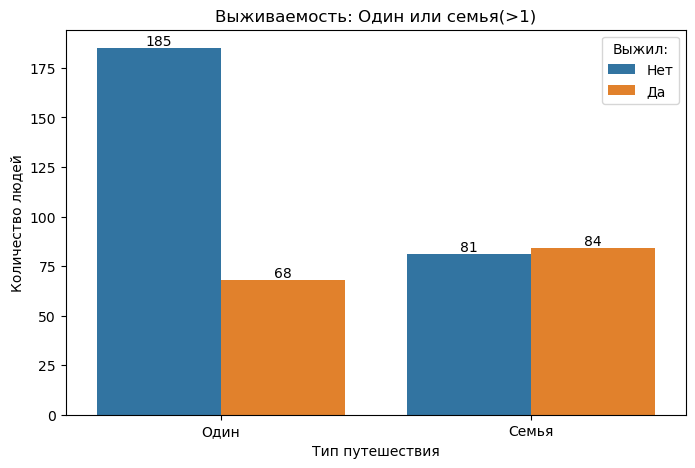

In [55]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Travel_t', hue='Survived', data=df) # Добавляет подписи в график
plt.title('Выживаемость: Один или семья(>1)')
plt.xlabel('Тип путешествия')
plt.ylabel('Количество людей')
plt.legend(title='Выжил:', labels=['Нет', 'Да'])
for container in ax.containers: # Добавляет подписи в график
    ax.bar_label(container)   
plt.show()